In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Part 3: Law of large numbers.

In [2]:
# Setting randomseed to ensure reproducibility:
import random
random.seed(1)


In [3]:
gaus = 0 + 4*np.random.standard_normal(10000) # 10000 random numbers from a normal distribution with mean 0 and standard deviation 4

In [4]:
len(gaus) # lenght of the array

10000

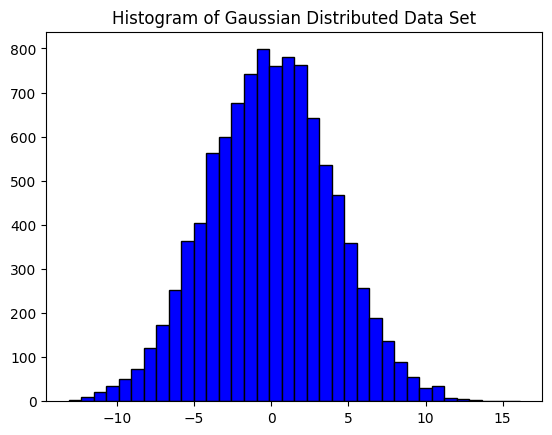

In [5]:
plt.hist(gaus, color = 'blue', edgecolor = 'black', bins = int(180/5)) # histogram of the array
plt.title('Histogram of Gaussian Distributed Data Set')
plt.show()

In [6]:
# Cumulative average:

a = range(1,len(gaus)+1) # array of numbers from 1 to 10000
cumaverage = np.cumsum(gaus)/a # cumulative average of the gaussian distribution
print(cumaverage)

[ 5.01492247  4.63341845  3.82105489 ... -0.0246703  -0.02393701
 -0.02415662]


In [7]:
# Cumulative standard error:
df_gaus = pd.DataFrame(gaus, columns = ['Gaussian']) # dataframe of the gaussian distribution

cum_std_error = df_gaus['Gaussian'].expanding().std() / np.sqrt(df_gaus['Gaussian'].expanding().count()) 
cum_std_error[0] = 0  # set the first element to 0 # cumulative standard error of the pareto distribution
print('Cumulative Std:',np.array(cum_std_error))

Cumulative Std: [0.         0.38150402 0.84169452 ... 0.0400456  0.04004831 0.04004491]


In [8]:
print('mean:', np.mean(gaus)) # mean of the gaussian distribution
print('median:', np.median(gaus)) # median of the gaussian distribution

mean: -0.02415662479764968
median: 0.010931525676723411


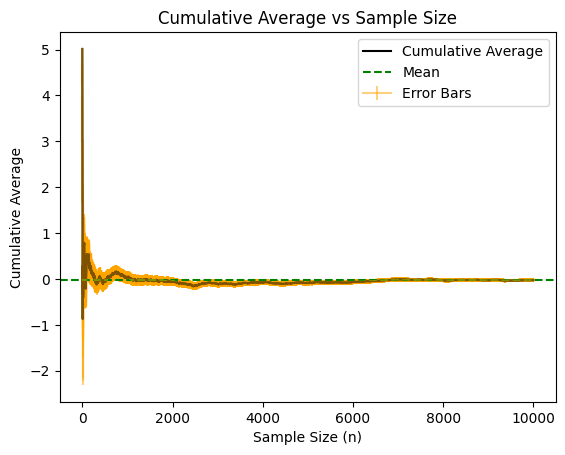

In [9]:
# Culimative average plot:

fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage, yerr=cum_std_error, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(gaus), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean of "gaus"  

 # Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Cumulative Average') 

 # Show legend and display plot 
plt.legend()  
plt.show()

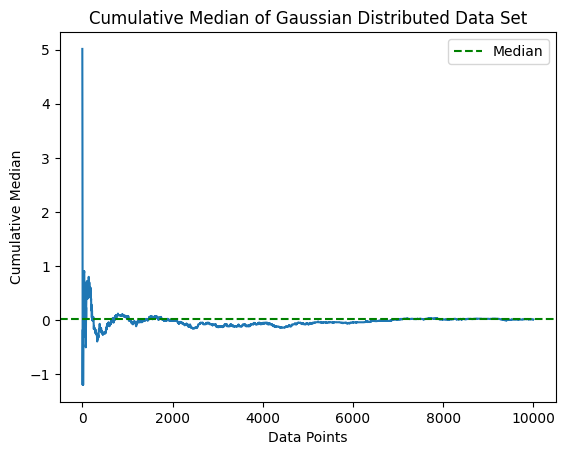

In [10]:
# Compute the cumulative median of the data set and store it in an array 
cumulative_median_gauss = df_gaus['Gaussian'].expanding().median()

# Plot the cumulative median array  
plt.plot(cumulative_median_gauss)
plt.axhline(y=np.median(gaus), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Gaussian Distributed Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')
plt.legend()
plt.show()

# Pareto

In [11]:
N = 10000
alpha = 0.5
x_m = 1
pareto =  x_m*(np.random.pareto(alpha, N)+1) # 10000 random numbers from a pareto distribution with alpha = 0.5 and x_m = 1

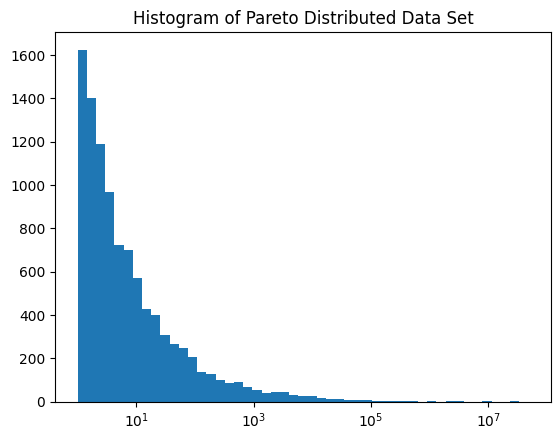

Cumulative Avg: [2.85806336e+00 2.45529452e+00 9.11767856e+00 ... 1.07839331e+04
 1.07828547e+04 1.07821454e+04]
Cumulative Std: [0.00000000e+00 4.02768839e-01 6.66644098e+00 ... 5.89339027e+03
 5.89280094e+03 5.89221168e+03]
      
mean: 10782.14542050422
median: 3.9552659991749177


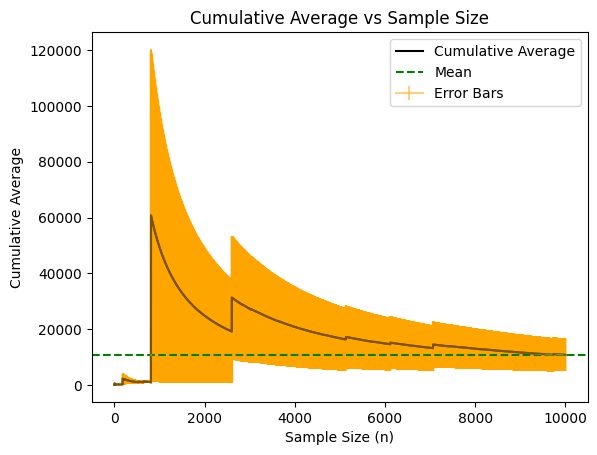

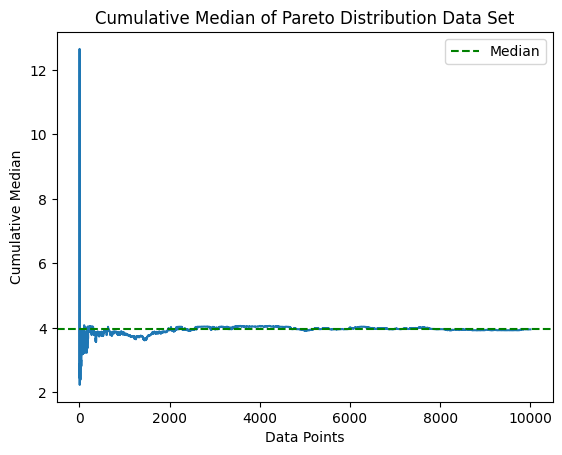

In [12]:
# Plot the histogram of the data 
plt.hist(pareto, bins=np.logspace(np.log10(min(pareto)), np.log10(max(pareto)), 50)) 
plt.gca().set_xscale("log") 
plt.title('Histogram of Pareto Distributed Data Set')  
plt.show()

# Create a dataframe from the array:
df_par = pd.DataFrame(pareto, columns=['Pareto'])

# Cumulative average
cumaverage_par = np.cumsum(pareto)/(range(1,len(pareto)+1))
print('Cumulative Avg:',cumaverage_par)

# Cumulative standard error using expanding() function (cumulative standard error of the mean)
cum_std_error_par = df_par['Pareto'].expanding().std() / np.sqrt(df_par['Pareto'].expanding().count()) 
cum_std_error_par[0] = 0  # set the first element to 0 # cumulative standard error of the pareto distribution
print('Cumulative Std:',np.array(cum_std_error_par))

print("      ")


# Compute mean and median of the data set:
print('mean:', np.mean(pareto))
print('median:', np.median(pareto))

# Culimative average plot:
fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage_par, yerr=cum_std_error_par, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage_par, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(pareto), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean 

# Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Cumulative Average')  

 # Show legend and display plot 
plt.legend()  
plt.show()


# Compute the cumulative median of the data set and store it in an array 
cumulative_median_par = df_par['Pareto'].expanding().median()

# Plot the cumulative median array  
plt.plot(cumulative_median_par) 
plt.axhline(y=np.median(pareto), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Pareto Distribution Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')
plt.legend()
plt.show()


# Lognormal

In [13]:
mu = 0
sigma = 4
N = 10000
lognor = np.random.lognormal(mean=mu, sigma=sigma, size=N) # 10000 random numbers from a lognormal distribution with mean 0 and standard deviation 4

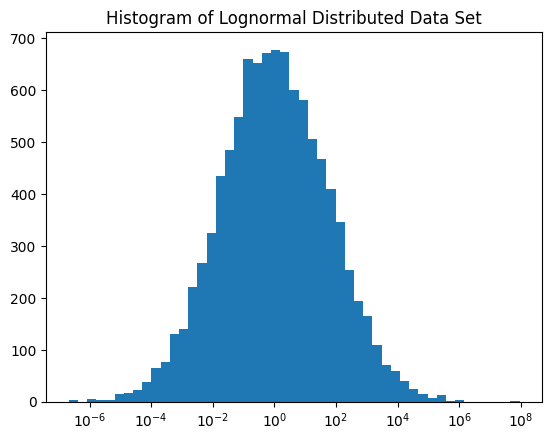

Cumulative Avg: [8.39390405e-04 8.56417525e-03 5.71683870e-03 ... 1.04506586e+04
 1.04496135e+04 1.04485687e+04]
Cumulative Std: [0.00000000e+00 7.72478484e-03 5.29132236e-03 ... 9.11640585e+03
 9.11549414e+03 9.11458260e+03]
      
mean: 10448.56866923872
median: 0.9649530455387297


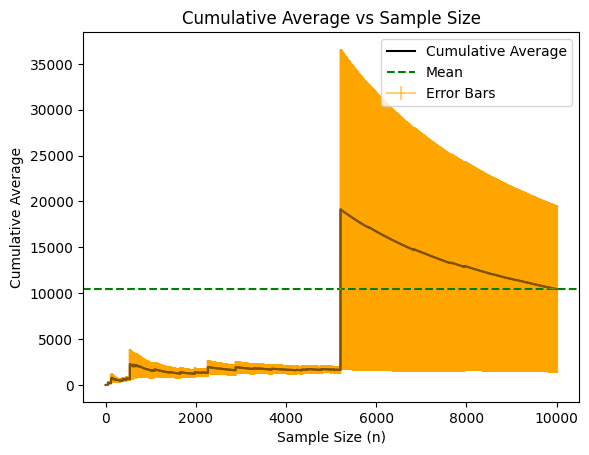

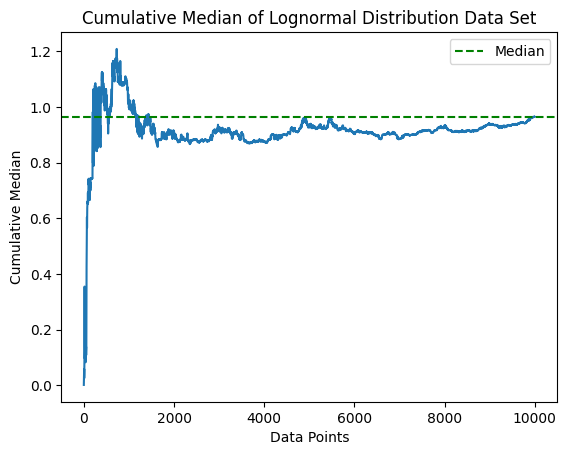

In [14]:
# Plot the histogram of the data 
plt.hist(lognor, bins=np.logspace(np.log10(min(lognor)), np.log10(max(lognor)), 50)) 
plt.gca().set_xscale("log")
plt.title('Histogram of Lognormal Distributed Data Set')  
plt.show()

# Create a dataframe from the array:
df_log = pd.DataFrame(lognor, columns=['Lognormal'])

# Cumulative average
cumaverage_lognor = np.cumsum(lognor)/(range(1,len(lognor)+1))
print('Cumulative Avg:',cumaverage_lognor)

# Cumulative standard error using expanding() function (cumulative standard error of the mean)
cum_std_error_lognor = df_log['Lognormal'].expanding().std() / np.sqrt(df_log['Lognormal'].expanding().count()) 
cum_std_error_lognor[0] = 0  # set the first element to 0 # cumulative standard error of the pareto distribution
print('Cumulative Std:',np.array(cum_std_error_lognor))

print("      ")

# Compute mean and median of the data set:
print('mean:', np.mean(lognor))
print('median:', np.median(lognor))

# Culimative average plot:
fig, ax = plt.subplots()

# Plot cumulative average as a line plot 
ax.errorbar(np.arange(10000), cumaverage_lognor, yerr=cum_std_error_lognor, color="orange", alpha=0.5, label='Error Bars') # Add errorbars to each point in the graph  
ax.plot(np.arange(10000), cumaverage_lognor, color='black', label='Cumulative Average') # Plot the cumulative average as a line plot
ax.axhline(y=np.mean(lognor), color='green', linestyle='--', label='Mean') # Add a horizontal line corresponding to the mean 

 # Set labels and title for the plot  
ax.set_title('Cumulative Average vs Sample Size')  
ax.set_xlabel('Sample Size (n)')  
ax.set_ylabel('Cumulative Average')  

 # Show legend and display plot 
plt.legend()  
plt.show()

# Compute the cumulative median of the data set and store it in an array
cumulative_median_lognor = df_log['Lognormal'].expanding().median()

# Plot the cumulative median array:
plt.plot(cumulative_median_lognor) 
plt.axhline(y=np.median(lognor), color='green', linestyle='--', label='Median')
plt.title('Cumulative Median of Lognormal Distribution Data Set')  
plt.xlabel('Data Points')  
plt.ylabel('Cumulative Median')  
plt.legend()
plt.show()

## Repetition on 2009 papers:

In [15]:
#df_citations = pd.read_csv('citations.csv')
#df_citations.head()